# CV2 使用

原址 https://www.cnblogs.com/shizhengwen/p/8719062.html

林肯针对上面的文章做了扩展和丰富，所以不能完全的一一对应。

本篇也是针对 CV 的一个全面的分析，会涉及到 CV 知识的方方面面。

## 安装

```python
pip install opencv-python
pip install opencv-python==3.3.0.10 -i https://pypi.doubanio.com/simple
```

In [1]:
pip install opencv-python -i https://pypi.doubanio.com/simple

Looking in indexes: https://pypi.doubanio.com/simple
Note: you may need to restart the kernel to use updated packages.


## 一、读入图像

使用函数cv2.imread(filepath,flags)读入一副图片

* filepath：要读入图片的完整路径
* flags：读入图片的标志   

    * cv2.IMREAD_COLOR：默认参数，读入一副彩色图片，忽略alpha通道
    * cv2.IMREAD_GRAYSCALE：读入灰度图片
    * cv2.IMREAD_UNCHANGED：顾名思义，读入完整图片，包括alpha通道

In [2]:
import cv2
img_color = cv2.imread('./mchar_train/000000.png',cv2.IMREAD_COLOR)
img_color

array([[[ 98, 112, 108],
        [ 97, 112, 108],
        [ 98, 114, 107],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[100, 114, 110],
        [ 99, 114, 110],
        [ 99, 115, 108],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[101, 116, 112],
        [101, 116, 112],
        [101, 117, 110],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 25,  21,  20],
        [ 24,  22,  21],
        [ 26,  24,  23],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 24,  23,  19],
        [ 23,  24,  20],
        [ 22,  23,  19],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 21,  22,  18],
        [ 22,  23,  19],
        [ 21,  22,  18],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
import cv2
img_gray = cv2.imread('./mchar_train/000000.png',cv2.IMREAD_GRAYSCALE)
img_gray ## 这个一定要好好记住，下面还会用到

array([[109, 109, 110, ..., 255, 255, 255],
       [111, 111, 111, ..., 255, 255, 255],
       [113, 113, 113, ..., 255, 255, 255],
       ...,
       [ 21,  21,  23, ..., 255, 255, 255],
       [ 21,  22,  21, ..., 255, 255, 255],
       [ 20,  21,  20, ..., 255, 255, 255]], dtype=uint8)

In [4]:
import cv2
img_unchanged = cv2.imread('./mchar_train/000000.png',cv2.IMREAD_UNCHANGED)
img_unchanged

array([[[ 98, 112, 108],
        [ 97, 112, 108],
        [ 98, 114, 107],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[100, 114, 110],
        [ 99, 114, 110],
        [ 99, 115, 108],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[101, 116, 112],
        [101, 116, 112],
        [101, 117, 110],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 25,  21,  20],
        [ 24,  22,  21],
        [ 26,  24,  23],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 24,  23,  19],
        [ 23,  24,  20],
        [ 22,  23,  19],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 21,  22,  18],
        [ 22,  23,  19],
        [ 21,  22,  18],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
# 让我们仔细看看这个图片里到底有什么
type(img_color)

numpy.ndarray

In [5]:
# 从 github 上 clone 一个项目下来
# 如果命令执行失败的话，可以手动的方式进行，下载 zip 包，然后解压

!git clone https://github.com/WangLaoShi/PythonUtils.git

fatal: destination path 'PythonUtils' already exists and is not an empty directory.


In [ ]:
# 如果已经有了，可以使用下面的命令更新
!cd PythonUtils/ && git pull && cd .. && pwd && ls

In [6]:
import sys,os

BASE_DIR = os.getcwd()# 本文件所在的绝对路径
# print(BASE_DIR)

if not BASE_DIR in sys.path:
    sys.path.append(BASE_DIR)
    print(sys.path)

# sys.path.append("." + "/PythonUtils")

import PythonUtils.NP.nputils as npu

npu.ndarrayInfo(img_color)

print("*"*30)

npu.ndarrayInfo(img_gray)
print("*"*30)

npu.ndarrayInfo(img_unchanged)


 ndim:     3
 shape:    (350, 741, 3)
 size:     778050
 dtype:    uint8
 itemsize: 1  bytes
 nbytes:   778050  bytes
******************************
 ndim:     2
 shape:    (350, 741)
 size:     259350
 dtype:    uint8
 itemsize: 1  bytes
 nbytes:   259350  bytes
******************************
 ndim:     3
 shape:    (350, 741, 3)
 size:     778050
 dtype:    uint8
 itemsize: 1  bytes
 nbytes:   778050  bytes


## 二、显示图像

使用函数cv2.imshow(wname,img)显示图像，第一个参数是显示图像的窗口的名字，第二个参数是要显示的图像（imread读入的图像），窗口大小自动调整为图片大小

```python
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
#cv2.destroyWindow(wname)
```

1.  cv2.waitKey顾名思义等待键盘输入，单位为毫秒，即等待指定的毫秒数看是否有键盘输入，若在等待时间内按下任意键则返回按键的ASCII码，程序继续运行。若没有按下任何键，超时后返回-1。参数为0表示无限等待。不调用waitKey的话，窗口会一闪而逝，看不到显示的图片。
2.  cv2.destroyAllWindow()销毁所有窗口
3.  cv2.destroyWindow(wname)销毁指定窗口

In [ ]:
# 老师运行一遍看看，同学们就可以跳过这个环节了
cv2.imshow('image',img_color) 
cv2.waitKey(0)
cv2.destroyAllWindows()

![wPjyol](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/wPjyol.png)

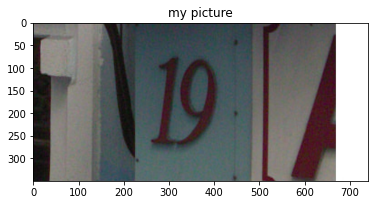

In [7]:
# 显示在 Jupyter 中
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(img_color) # https://www.cnblogs.com/denny402/p/5122594.html
plt.title('my picture')
plt.show()

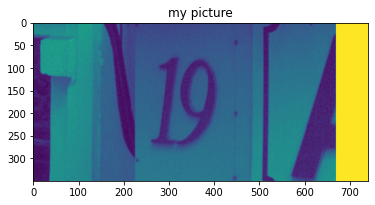

In [8]:
# 显示在 Jupyter 中
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(img_gray)
plt.title('my picture')
plt.show()

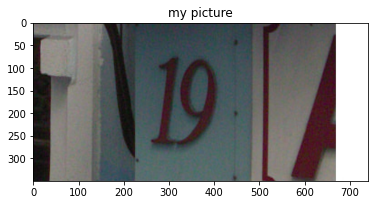

In [9]:
# 显示在 Jupyter 中
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(img_unchanged)
plt.title('my picture')
plt.show()

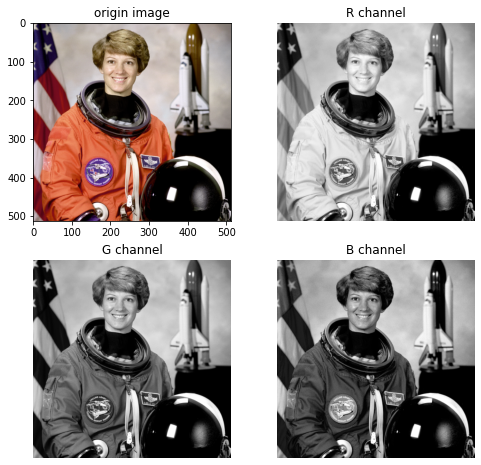

In [10]:
# 来一个更丰富的例子

from skimage import data
import matplotlib.pyplot as plt
img = data.astronaut()
plt.figure(num='astronaut',figsize=(8,8))  #创建一个名为astronaut的窗口,并设置大小 

plt.subplot(2,2,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('origin image')   #第一幅图片标题
plt.imshow(img)      #绘制第一幅图片

plt.subplot(2,2,2)     #第二个子图
plt.title('R channel')   #第二幅图片标题
plt.imshow(img[:,:,0],plt.cm.gray)      #绘制第二幅图片,且为灰度图
plt.axis('off')     #不显示坐标尺寸

plt.subplot(2,2,3)     #第三个子图
plt.title('G channel')   #第三幅图片标题
plt.imshow(img[:,:,1],plt.cm.gray)      #绘制第三幅图片,且为灰度图
plt.axis('off')     #不显示坐标尺寸

plt.subplot(2,2,4)     #第四个子图
plt.title('B channel')   #第四幅图片标题
plt.imshow(img[:,:,2],plt.cm.gray)      #绘制第四幅图片,且为灰度图
plt.axis('off')     #不显示坐标尺寸

plt.show()   #显示窗口

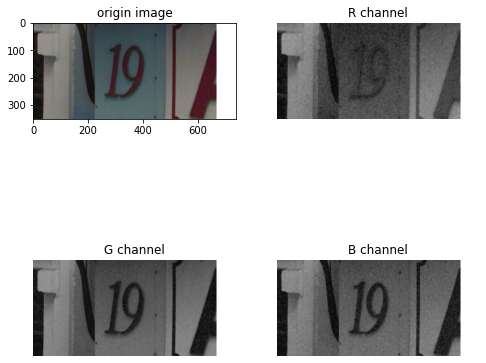

In [13]:
import PythonUtils.plt.ORGB as ORGB

ORGB.orgb(img_color)

## 三、保存图像

使用函数cv2.imwrite(file，img，num)保存一个图像。第一个参数是要保存的文件名，第二个参数是要保存的图像。可选的第三个参数，它针对特定的格式：对于JPEG，其表示的是图像的质量，用0 - 100的整数表示，默认95;对于png ,第三个参数表示的是压缩级别。默认为3.

注意:

1.  cv2.IMWRITE_JPEG_QUALITY类型为 long ,必须转换成 int
2.  cv2.IMWRITE_PNG_COMPRESSION, 从0到9 压缩级别越高图像越小。

```python
cv2.imwrite('1.png',img, [int( cv2.IMWRITE_JPEG_QUALITY), 95])
cv2.imwrite('1.png',img, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
```

In [7]:
cv2.imwrite('1-jpeg-q95.png',img_color, [int( cv2.IMWRITE_JPEG_QUALITY), 95])
cv2.imwrite('1-png-c9.png',img_color, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])

True

In [8]:
!ls -la

total 2338816
drwxrwxrwx  1 lw  staff    1048576 Apr  5 16:06 .
drwxrwxrwx@ 1 lw  staff    1048576 Nov 18 19:43 ..
-rwxrwxrwx  1 lw  staff       4096 Apr  7 19:22 ._bpxyGD.jpg
-rwxrwxrwx  1 lw  staff       4096 Apr  7 19:09 ._cropped_tree.jpg
-rwxrwxrwx  1 lw  staff       4096 Apr  7 20:35 ._desk-image0.jpg
-rwxrwxrwx  1 lw  staff       4096 Apr  7 18:04 ._export-2022-04-07T10_04_43.151Z.json
-rwxrwxrwx  1 lw  staff       4096 Apr  8 17:59 ._huihui-face.jpg
-rwxrwxrwx  1 lw  staff       4096 Apr  5 17:00 ._mchar_data_list_0515.csv
-rwxrwxrwx  1 lw  staff       4096 Apr  5 20:26 ._mchar_train.json
-rwxrwxrwx  1 lw  staff       4096 Apr  5 19:09 ._mchar_val
-rwxrwxrwx  1 lw  staff       4096 Apr  5 19:04 ._mchar_val.zip
-rwxrwxrwx  1 lw  staff       4096 Apr  7 17:52 ._roi.jpg
-rwxrwxrwx  1 lw  staff       4096 Apr  7 17:56 ._roi.json
-rwxrwxrwx  1 lw  staff       4096 Apr  7 18:48 ._test_400x600.jpg
-rwxrwxrwx  1 lw  staff       4096 Apr  7 21:05 ._time_lapse.avi
-rwxrwxrwx  1 lw  staff

In [10]:
import PythonUtils.notebook.nbu as nbu

imgs = ['1-jpeg-q95.png','1-png-c9.png']

nbu.gallery(imgs)

In [11]:
from PIL import Image
from PIL.ExifTags import TAGS
import os

# path to the image or video
# imagename = "./mchar_train/004863.png"

def showImageInfo(imagename):
    # read the image data using PIL
    image = Image.open(imagename)

    # extract other basic metadata
    info_dict = {
        "Filename": image.filename,
        "Image Size": image.size,
        "Image Height": image.height,
        "Image Width": image.width,
        "Image Format": image.format,
        "Image Mode": image.mode,
        "Image is Animated": getattr(image, "is_animated", False),
        "Frames in Image": getattr(image, "n_frames", 1)
    }

    for label,value in info_dict.items():
        print(f"{label:25}: {value}")
    
    print(os.stat(imagename))
    print(os.path.getsize(imagename))
    print(os.path.getmtime(imagename))
    print(os.path.getctime(imagename))

for img in imgs:
    showImageInfo(img)
    print("*"*25)

Filename                 : 1-jpeg-q95.png
Image Size               : (741, 350)
Image Height             : 350
Image Width              : 741
Image Format             : PNG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1
os.stat_result(st_mode=33279, st_ino=789953, st_dev=16777228, st_nlink=1, st_uid=501, st_gid=20, st_size=340574, st_atime=1649421876, st_mtime=1649421698, st_ctime=1649421698)
340574
1649421698.23
1649421698.23
*************************
Filename                 : 1-png-c9.png
Image Size               : (741, 350)
Image Height             : 350
Image Width              : 741
Image Format             : PNG
Image Mode               : RGB
Image is Animated        : False
Frames in Image          : 1
os.stat_result(st_mode=33279, st_ino=789954, st_dev=16777228, st_nlink=1, st_uid=501, st_gid=20, st_size=300983, st_atime=1649421882, st_mtime=1649421698, st_ctime=1649421698)
300983
1649421698.65
1649421698.65
**********************

## 四、图片操作

1、使用函数cv2.flip(img,flipcode)翻转图像，flipcode控制翻转效果。

* flipcode = 0：沿x轴翻转,垂直翻转
* flipcode > 0：沿y轴翻转,水平翻转
* flipcode < 0：x,y轴同时翻转,水平垂直翻转

```python
imgflip = cv2.flip(img,1)
```


![hZFCxF](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/hZFCxF.jpg)


![4ZoqZA](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/4ZoqZA.jpg)


![TdA20U](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/TdA20U.jpg)

2、复制图像

```python
imgcopy = img.copy()
```

3、颜色空间转换

```python
#彩色图像转为灰度图像
img2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) 
#灰度图像转为彩色图像
img3 = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
# cv2.COLOR_X2Y，其中X,Y = RGB, BGR, GRAY, HSV, YCrCb, XYZ, Lab, Luv, HLS
```

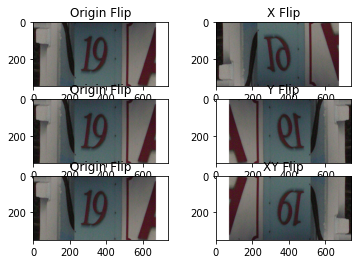

In [22]:


plt.subplot(3, 2, 1)
plt.imshow(img_color)
plt.title('Origin Flip')

imgflipx = cv2.flip(img_color,0)
plt.subplot(3, 2, 2)
plt.imshow(imgflipx)
plt.title('X Flip')

plt.subplot(3, 2, 3)
plt.imshow(img_color)
plt.title('Origin Flip')


imgflipy = cv2.flip(img_color,1)
plt.subplot(3, 2, 4)
plt.imshow(imgflipy)
plt.title('Y Flip')

plt.subplot(3, 2, 5)
plt.imshow(img_color)
plt.title('Origin Flip')

imgflipxy = cv2.flip(img_color,-1)
plt.subplot(3, 2, 6)
plt.imshow(imgflipxy)
plt.title('XY Flip')


plt.show()

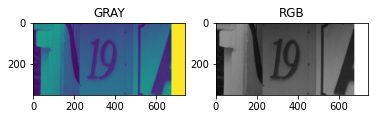

In [23]:
# 彩色图像转为灰度图像
img2 = cv2.cvtColor(img_color,cv2.COLOR_RGB2GRAY) 
# 灰度图像转为彩色图像
img3 = cv2.cvtColor(img2,cv2.COLOR_GRAY2RGB)
# cv2.COLOR_X2Y，其中X,Y = RGB, BGR, GRAY, HSV, YCrCb, XYZ, Lab, Luv, HLS

plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title('GRAY')

plt.subplot(1, 2, 2)
plt.imshow(img3)
plt.title('RGB')

plt.show()

### 示例,等待按键保存图片

读入一副图像，按’s’键保存后退出，其它任意键则直接退出不保存

```python
import cv2
img = cv2.imread('1.jpg',cv2.IMREAD_UNCHANGED)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('1.png',img)
    cv2.destroyAllWindows()
else: 
    cv2.destroyAllWindows()
```

### 示例，图片加文本

读入一副图像，给图片加文本

```python
import cv2

# img=cv2.imread('1.jpg',cv2.IMREAD_COLOR)
img=cv2.imread('1.png',cv2.IMREAD_COLOR)    # 打开文件
font = cv2.FONT_HERSHEY_DUPLEX  # 设置字体
# 图片对象、文本、像素、字体、字体大小、颜色、字体粗细
imgzi = cv2.putText(img, "zhengwen", (1100, 1164), font, 5.5, (0, 0, 0), 2,)
# cv2.imshow('lena',img)
cv2.imwrite('5.png',img)    # 写磁盘
cv2.destroyAllWindows()     # 毁掉所有窗口
cv2.destroyWindow(wname)    # 销毁指定窗口
```

In [12]:
import cv2

# img=cv2.imread('1.jpg',cv2.IMREAD_COLOR)
img  = cv2.imread('./mchar_train/000000.png',cv2.IMREAD_COLOR)    # 打开文件
font = cv2.FONT_HERSHEY_DUPLEX  # 设置字体
#                  图片对象、文本、    像素、       字体、字体大小、颜色、   字体粗细
# imgzi = cv2.putText(img, "zhengwen", (0, 0), font, 5.5, (0, 0, 0), 2,)
imgzi = cv2.putText(img, "zhengwen", (5,50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
# cv2.imshow('lena',img)
cv2.imwrite('5-zhongwen.png',imgzi)    # 写磁盘
cv2.destroyAllWindows()     # 毁掉所有窗口
# cv2.destroyWindow(wname)    # 销毁指定窗口

In [13]:
# importing cv2 
import cv2 
    
# path 
path = r'./mchar_train/000000.png'
    
# Reading an image in default mode 
image = cv2.imread(path) 
    
# Window name in which image is displayed 
window_name = 'Image'
  
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# org 
org = (50, 50) 
  
# fontScale 
fontScale = 1
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
   
# Using cv2.putText() method 
image = cv2.putText(image, 'OpenCV', org, font,  
                   fontScale, color, thickness, cv2.LINE_AA) 
   
# Displaying the image 
# cv2.imshow(window_name, image) 
os.remove('5-zhongwen.png') 
cv2.imwrite('5-zhongwen.png',image)    # 写磁盘
cv2.destroyAllWindows()     # 毁掉所有窗口

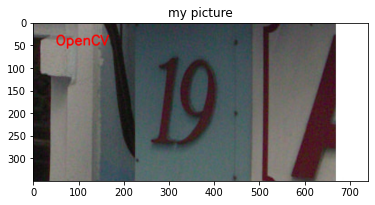

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./5-zhongwen.png',cv2.IMREAD_COLOR))
plt.title('my picture')
plt.show()

配合画图

```python
import numpy as np
import cv2

np.set_printoptions(threshold='nan')
# 创建一个宽512高512的黑色画布，RGB(0,0,0)即黑色
img=np.zeros((512,512,3),np.uint8)


# 画直线,图片对象，起始坐标(x轴,y轴)，结束坐标，颜色，宽度
cv2.line(img,(0,0),(311,511),(255,0,0),10)
# 画矩形，图片对象，左上角坐标，右下角坐标，颜色，宽度
cv2.rectangle(img,(30,166),(130,266),(0,255,0),3)
# 画圆形，图片对象，中心点坐标，半径大小，颜色，宽度
cv2.circle(img,(222,222),50,(255.111,111),-1)
# 画椭圆形，图片对象，中心点坐标，长短轴，顺时针旋转度数，开始角度(右长轴表0度，上短轴表270度)，颜色，宽度
cv2.ellipse(img,(333,333),(50,20),0,0,150,(255,222,222),-1)

# 画多边形，指定各个点坐标,array必须是int32类型
pts=np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
# -1表示该纬度靠后面的纬度自动计算出来，实际上是4

pts = pts.reshape((-1,1,2,))
# print(pts)
# 画多条线，False表不闭合，True表示闭合，闭合即多边形
cv2.polylines(img,[pts],True,(255,255,0),5)

#写字,字体选择
font=cv2.FONT_HERSHEY_SCRIPT_COMPLEX

# 图片对象，要写的内容，左边距，字的底部到画布上端的距离，字体，大小，颜色，粗细
cv2.putText(img,"OpenCV",(10,400),font,3.5,(255,255,255),2)

a=cv2.imwrite("picture.jpg",img)
cv2.imshow("picture",img)
cv2.waitKey(0)

cv2.destroyAllWindows()
```

In [26]:
import numpy as np
import cv2

np.set_printoptions(threshold=5)
# 创建一个宽512高512的黑色画布，RGB(0,0,0)即黑色
img = np.zeros((512,512,3),np.uint8)


# 画直线,图片对象，起始坐标(x轴,y轴)，结束坐标，颜色，宽度
cv2.line(img,(0,0),(311,511),(255,0,0),10)
# 画矩形，图片对象，左上角坐标，右下角坐标，颜色，宽度
cv2.rectangle(img,(30,166),(130,266),(0,255,0),3)
# 画圆形，图片对象，中心点坐标，半径大小，颜色，宽度
cv2.circle(img,(222,222),50,(255.111,111),-1)
# 画椭圆形，图片对象，中心点坐标，长短轴，顺时针旋转度数，开始角度(右长轴表0度，上短轴表270度)，颜色，宽度
cv2.ellipse(img,(333,333),(50,20),0,0,150,(255,222,222),-1)

# 画多边形，指定各个点坐标,array必须是int32类型
pts=np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
# -1表示该纬度靠后面的纬度自动计算出来，实际上是4

pts = pts.reshape((-1,1,2,))
# print(pts)
# 画多条线，False表不闭合，True表示闭合，闭合即多边形
cv2.polylines(img,[pts],True,(255,255,0),5)

#写字,字体选择
font=cv2.FONT_HERSHEY_SCRIPT_COMPLEX

# 图片对象，要写的内容，左边距，字的底部到画布上端的距离，字体，大小，颜色，粗细
cv2.putText(img,"OpenCV",(10,400),font,3.5,(255,255,255),2)

a=cv2.imwrite("picture.jpg",img)
# cv2.imshow("picture",img)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

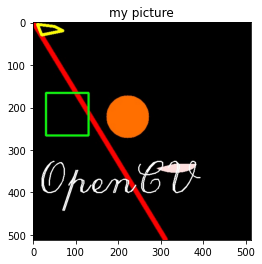

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./picture.jpg',cv2.IMREAD_COLOR))
plt.title('my picture')
plt.show()

In [30]:
import numpy as np
import cv2

np.set_printoptions(threshold=5)
# 创建一个宽512高512的黑色画布，RGB(0,0,0)即黑色
img = np.zeros((512,512,3),np.uint8)

for x in range(256):
    for y in range(256):
        cv2.rectangle(img, (x*2, y*2), ((x+1)*2, (y+1)*2), (x, y, 0), thickness=-1)

a=cv2.imwrite("picture-rgb.jpg",img)


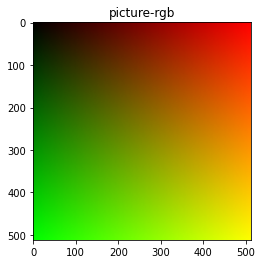

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./picture-rgb.jpg',cv2.IMREAD_COLOR))
plt.title('picture-rgb')
plt.show()

![Tclwxf](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Tclwxf.png)

In [45]:
# 欢迎杨大大为计算机视觉做出的贡献

# 来点有用的 https://github.com/tzutalin/labelImg

# 上面这个太麻烦了

# https://github.com/rachelcao277/LabelImage 这个好
# https://labelhub.cn/home
# https://app.labelbox.com/signin
# http://www.jinglingbiaozhu.com/



# importing cv2 
import cv2 
    
# path 
path = r'./yanghui.jpeg' # 1920 * 800 的 3 维数组
    
# Reading an image in default mode 
image = cv2.imread(path) 

face = image[20:232,495:640]

image[0:212,0:145] = face

for i in range(10):

    image[212:424,145*(i):145*(i+1)] = face



cv2.imwrite("huihui-face.jpg",image)

True

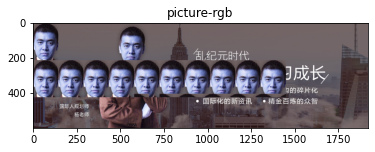

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./huihui-face.jpg',cv2.IMREAD_UNCHANGED))
plt.title('picture-rgb')
plt.show()

## 五、图像的表示

前面章节已经提到过了单通道的灰度图像在计算机中的表示，就是一个8位无符号整形的矩阵。

在 OpenCV 的 C++ 代码中，表示图像有个专门的结构叫做cv::Mat，不过在 Python-OpenCV 中，因为已经有了numpy 这种强大的基础工具，所以这个矩阵就用 numpy 的array 表示。

如果是多通道情况，最常见的就是红绿蓝（RGB）三通道，

则第一个维度是高度，第二个维度是宽度，第三个维度是通道，比如下图是一幅3×3图像在计算机中表示的例子：

![WmrYEb](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/WmrYEb.jpg)


图中，右上角的矩阵里每个元素都是一个3维数组，分别代表这个像素上的三个通道的值。

最常见的RGB通道中，

* 第一个元素是红色（Red）的值，
* 第二个元素是绿色（Green）的值，
* 第三个元素是蓝色（Blue）的值，

最终得到的图像如 a 所示。

RGB 是最常见的情况，然而在 OpenCV 中，默认的图像的表示确实反过来的，也就是 BGR，得到的图像是 b。

可以看到，前两行的颜色顺序都交换了，最后一行是三个通道等值的灰度图，所以没有影响。

至于 OpenCV 为什么不是人民群众喜闻乐见的 RGB，这是历史遗留问题，在 OpenCV 刚开始研发的年代，BGR 是相机设备厂商的主流表示方法，虽然后来 RGB 成了主流和默认，但是这个底层的顺序却保留下来了，事实上 Windows 下的最常见格式之一 bmp，底层字节的存储顺序还是 BGR。OpenCV 的这个特殊之处还是需要注意的，比如在 Python 中，图像都是用 numpy 的 array 表示，但是同样的 array 在 OpenCV 中的显示效果和 matplotlib 中的显示效果就会不一样。

下面的简单代码就可以生成两种表示方式下，图中矩阵的对应的图像，生成图像后，放大看就能体会到区别：

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 图中的矩阵
img = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]],
    [[255, 255, 255], [128, 128, 128], [0, 0, 0]],
], dtype=np.uint8)

# 用matplotlib存储
plt.imsave('img_pyplot.jpg', img)

# 用OpenCV存储
cv2.imwrite('img_cv2.jpg', img)

True

![jyDDn8](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/jyDDn8.png)

不管是 RGB 还是 BGR，都是高度×宽度×通道数，H×W×C的表达方式，而在深度学习中，因为要对不同通道应用卷积，所以用的是另一种方式：C×H×W，就是把每个通道都单独表达成一个二维矩阵，如图 c 所示。

![TCt27r](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/TCt27r.png)

## 六、基本图像处理

### 存取图像

读图像用cv2.imread()，可以按照不同模式读取，一般最常用到的是读取单通道灰度图，或者直接默认读取多通道。存图像用cv2.imwrite()，注意存的时候是没有单通道这一说的，根据保存文件名的后缀和当前的array维度，OpenCV自动判断存的通道，另外压缩格式还可以指定存储质量，来看代码例子：

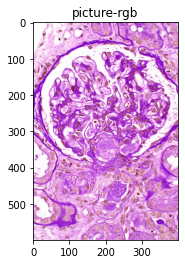

In [49]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./test_400x600.jpg',cv2.IMREAD_UNCHANGED))
plt.title('picture-rgb')
plt.show()

In [50]:

import cv2

# 读取一张400x600分辨率的图像
color_img = cv2.imread('test_400x600.jpg')
print(color_img.shape)

# 直接读取单通道
gray_img = cv2.imread('test_400x600.jpg', cv2.IMREAD_GRAYSCALE)
print(gray_img.shape)

# 把单通道图片保存后，再读取，仍然是3通道，相当于把单通道值复制到3个通道保存
cv2.imwrite('test_grayscale.jpg', gray_img)

reload_grayscale = cv2.imread('test_grayscale.jpg')

print(reload_grayscale.shape)

# cv2.IMWRITE_JPEG_QUALITY指定jpg质量，范围0到100，默认95，越高画质越好，文件越大
cv2.imwrite('test_imwrite.jpg', color_img, (cv2.IMWRITE_JPEG_QUALITY, 80))

# cv2.IMWRITE_PNG_COMPRESSION指定png质量，范围0到9，默认3，越高文件越小，画质越差
cv2.imwrite('test_imwrite.png', color_img, (cv2.IMWRITE_PNG_COMPRESSION, 5))


(600, 400, 3)
(600, 400)
(600, 400, 3)


True

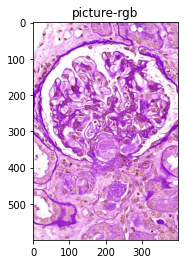

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./test_imwrite.jpg',cv2.IMREAD_UNCHANGED))
plt.title('picture-rgb')
plt.show()

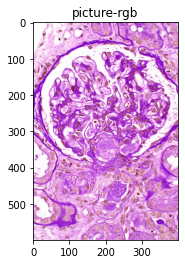

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./test_imwrite.png',cv2.IMREAD_UNCHANGED))
plt.title('picture-rgb')
plt.show()

### 缩放，裁剪和补边

缩放通过cv2.resize()实现，裁剪则是利用 array 自身的下标截取实现，此外 OpenCV 还可以给图像补边，这样能对一幅图像的形状和感兴趣区域实现各种操作。下面的例子中读取一幅400×600分辨率的图片，并执行一些基础的操作：

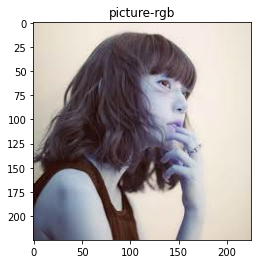

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread('./zhengfangxing_zhengjietong.jpeg',cv2.IMREAD_UNCHANGED))
plt.title('picture-rgb')
plt.show()

In [54]:
import cv2

# 读取照片
img = cv2.imread('zhengfangxing_zhengjietong.jpeg')

# 缩放成200x200的方形图像
img_200x200 = cv2.resize(img, (200, 200))

# 不直接指定缩放后大小，通过fx和fy指定缩放比例，0.5则长宽都为原来一半
# 等效于img_200x300 = cv2.resize(img, (300, 200))，注意指定大小的格式是(宽度,高度)
# 插值方法默认是cv2.INTER_LINEAR，这里指定为最近邻插值
img_200x300 = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, 
                              interpolation=cv2.INTER_NEAREST)

# 在上张图片的基础上，上下各贴50像素的黑边，生成300x300的图像
img_300x300 = cv2.copyMakeBorder(img, 50, 50, 0, 0, 
                                       cv2.BORDER_CONSTANT, 
                                       value=(0, 0, 0))

# 对照片中树的部分进行剪裁
patch_tree = img[20:150, -180:-50]

cv2.imwrite('cropped_tree.jpg', patch_tree)
cv2.imwrite('resized_200x200.jpg', img_200x200)
cv2.imwrite('resized_200x300.jpg', img_200x300)
cv2.imwrite('bordered_300x300.jpg', img_300x300)

True

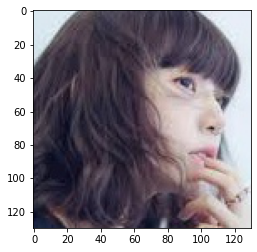

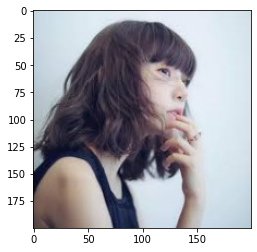

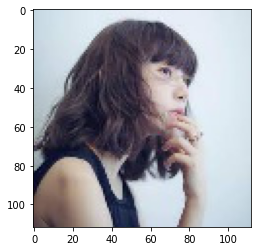

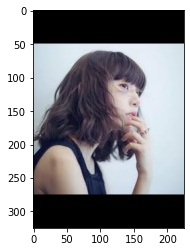

In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

images = ['cropped_tree.jpg','resized_200x200.jpg','resized_200x300.jpg','bordered_300x300.jpg'] 
    
for file in images:
    process(file)
    
    

### 色调，明暗，直方图和Gamma曲线

除了区域，图像本身的属性操作也非常多，比如可以通过HSV空间对色调和明暗进行调节。HSV 空间是由美国的图形学专家A. R. Smith提出的一种颜色空间，HSV 分别是色调（Hue），饱和度（Saturation）和明度（Value）。在 HSV 空间中进行调节就避免了直接在RGB空间中调节是还需要考虑三个通道的相关性。OpenCV中 H 的取值是[0, 180) ，其他两个通道的取值都是[0, 256)，下面例子接着上面例子代码，通过HSV空间对图像进行调整：


```python
# 通过cv2.cvtColor把图像从BGR转换到HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# H空间中，绿色比黄色的值高一点，所以给每个像素+15，黄色的树叶就会变绿
turn_green_hsv = img_hsv.copy()
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+15) % 180
turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('turn_green.jpg', turn_green_img)

# 减小饱和度会让图像损失鲜艳，变得更灰
colorless_hsv = img_hsv.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]
colorless_img = cv2.cvtColor(colorless_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('colorless.jpg', colorless_img)

# 减小明度为原来一半
darker_hsv = img_hsv.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]
darker_img = cv2.cvtColor(darker_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite('darker.jpg', darker_img)
```

无论是 HSV 还是 RGB，我们都较难一眼就对像素中值的分布有细致的了解，这时候就需要直方图。如果直方图中的成分过于靠近0或者255，可能就出现了暗部细节不足或者亮部细节丢失的情况。

比如图6-2中，背景里的暗部细节是非常弱的。

这个时候，一个常用方法是考虑用Gamma变换来提升暗部细节。Gamma变换是矫正相机直接成像和人眼感受图像差别的一种常用手段，简单来说就是通过非线性变换让图像从对曝光强度的线性响应变得更接近人眼感受到的响应。具体的定义和实现，还是接着上面代码中读取的图片，执行计算直方图和Gamma变换的代码如下：



```python

import numpy as np

# 分通道计算每个通道的直方图
hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])

# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)

# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升
img_corrected = gamma_trans(img, 0.5)
cv2.imwrite('gamma_corrected.jpg', img_corrected)

# 分通道计算Gamma矫正后的直方图
hist_b_corrected = cv2.calcHist([img_corrected], [0], None, [256], [0, 256])
hist_g_corrected = cv2.calcHist([img_corrected], [1], None, [256], [0, 256])
hist_r_corrected = cv2.calcHist([img_corrected], [2], None, [256], [0, 256])

# 将直方图进行可视化
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

pix_hists = [
    [hist_b, hist_g, hist_r],
    [hist_b_corrected, hist_g_corrected, hist_r_corrected]
]

pix_vals = range(256)
for sub_plt, pix_hist in zip([121, 122], pix_hists):
    ax = fig.add_subplot(sub_plt, projection='3d')
    for c, z, channel_hist in zip(['b', 'g', 'r'], [20, 10, 0], pix_hist):
        cs = [c] * 256
        ax.bar(pix_vals, channel_hist, zs=z, zdir='y', color=cs, alpha=0.618, edgecolor='none', lw=0)

    ax.set_xlabel('Pixel Values')
    ax.set_xlim([0, 256])
    ax.set_ylabel('Channels')
    ax.set_zlabel('Counts')

plt.show()

```

上面三段代码的结果统一放在下图中：

![bpxyGD](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/bpxyGD.jpg)

可以看到，Gamma变换后的暗部细节比起原图清楚了很多，并且从直方图来看，像素值也从集中在0附近变得散开了一些。

### 图像的仿射变换


图像的几何变换主要包括：平移、缩放、旋转、仿射、透视等等。图像变换是建立在矩阵运算基础上的，通过矩阵运算可以很快的找到不同图像的对应关系。理解变换的原理需要理解变换的构造方法以及矩阵的运算方法。



图像的几何变换主要分为三类：刚性变换、仿射变换和透视变换，如下图：

![ZV87Ky](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/ZV87Ky.png)

仿射变换是从一个二维坐标系变换到另一个二维坐标系，属于线性变换。通过已知3对坐标点可以求得变换矩阵。

透视变换是从一个二维坐标系变换到一个三维坐标系，属于非线性变换。通过已知4对坐标点可以求得变换矩阵。


#### 图像基本变换

图像的几何变换包含很多变换，其中有一些基本变换，而仿射变换和透视变换就是对这些基本变换进行组合实现的。



基本变换具体包括：平移（Translation）、缩放（Scale）、旋转（Rotation）、翻转（Flip）和错切（Shear）。

a. 平移

![DKiXn8](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/DKiXn8.png)

![dZzEGa](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/dZzEGa.jpg)

b. 缩放

![cZ5wdv](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/cZ5wdv.png)

![xgC6jT](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/xgC6jT.jpg)

c. 旋转

![aG0aUF](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/aG0aUF.png)

![FWV10A](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/FWV10A.jpg)

d. 翻转

![c6fyVX](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/c6fyVX.png)

e. 错切

错切亦称为剪切或错位变换，包含水平错切和垂直错切，常用于产生弹性物体的变形处理。

![Uvwp8z](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/Uvwp8z.png)


![tYs6J7](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/tYs6J7.jpg)

shx = tx/h;

shy = ty/w;

其中h，w分别原图像高和宽；



下面这张图可能更形象：


![0K6604](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/0K6604.jpg)



#### 原理

对于二维坐标系的一个坐标点（x，y），可以使用一个2x2矩阵来调整x，y的值，而通过调整x，y可以实现二维形状的线性变换（旋转，缩放），所以整个转换过程就是对（x，y）调整的过程。



仿射变换（Affine Transformation）是指在向量空间中进行一次线性变换(乘以一个矩阵)和一次平移(加上一个向量)，变换到另一个向量空间的过程。



仿射变换代表的是两幅图之间的映射关系，仿射变换矩阵为2x3的矩阵，如下图中的矩阵M，其中的B起着 平移 的作用，而A中的对角线决定 缩放，反对角线决定 旋转 或 错切。

所以仿射变换可以由一个矩阵A和一个向量B给出：

$$
A =   \begin{bmatrix}  a_{00} & a_{01} \\  a_{10} & a_{11} \end{bmatrix}_{2 \times 2} ,\ \ B =   \begin{bmatrix}  b_{00} \\  b_{10} \end{bmatrix}_{2 \times 1} 
$$


$$
M =  \begin{bmatrix}  A & B \end{bmatrix} =    \begin{bmatrix}  a_{00} & a_{01} & b_{00} \\  a_{10} & a_{11} & b_{10} \end{bmatrix}_{2 \times 3}
$$

原像素点坐标(x,y)，经过仿射变换后的点的坐标是T，则矩阵仿射变换基本算法原理：

$$
\begin{bmatrix}  u \\  v \end{bmatrix} =   A \cdot   \begin{bmatrix}  x \\  y \end{bmatrix}   + B \\
$$

所以仿射变换是一种二维坐标（x, y）到二维坐标（u, v）的线性变换，其数学表达式如下：

$$
\begin{cases}  u = a_1x + b_1y + c_1 \\ v = a_2x + b_2y + c_2  \end{cases} \\
$$


其实到这里还没完，我们知道缩放和旋转通过矩阵乘法来实现，而平移是通过矩阵加法来实现的，为了将这几个操作都通过一个矩阵来实现，所以构造出了上面那个 2x3 的矩阵。

但是这个会改变图像的尺寸，比如一个 2x2 的图像，乘以 2x3 的矩阵，会得到 2x3 的图像，所以为了解决这个问题，我们就增加一个维度，也就是构造齐次坐标矩阵。



最终得到的[齐次坐标矩阵](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/SI23Gb.png)表示形式为：


$$
\begin{bmatrix}  u \\  v \\  1 \end{bmatrix} =    \begin{bmatrix}  a_1 & b_1 & c_1 \\  a_2 & b_2 & c_2 \\  0 & 0 & 1 \end{bmatrix}   \begin{bmatrix}  x \\  y \\  1 \end{bmatrix} \\
$$

仿射变换保持了二维图像的“**平直性**”和“**平行性**”：

平直性：

* 直线经仿射变换后还是直线
* 圆弧经仿射变换后还是圆弧

平行性：

* 直线之间的相对位置关系保持不变
* 平行线经仿射变换后依然为平行线
* 直线上点的位置顺序不会发生变化
* 向量间夹角可能会发生变化

#### 一种实现



通过仿射变换将图片中的每个像素点按照一定的规律映射到新的位置，仿射变化需要一个转换矩阵，但是由于仿射变换比较复杂，一般很难直接找到这个矩阵，opencv提供了根据源图像和目标图像上三个对应的点来自动创建变换矩阵，矩阵维度为 2x3。

![BZU5Ge](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/BZU5Ge.jpg)

两个图像中非共线的三对对应点确定唯一的一个仿射变换。经仿射变换后，图像中的三个关键点依然构成三角形，但三角形形状已经发生变化。



这个函数是 cv2.getAffineTransform(pos1,pos2)，其中两个位置就是变换前后的对应位置关系。输出的就是仿射矩阵M，最后这个矩阵会被传给函数 cv2.warpAffine() 来实现仿射变换。

原图为：

![YIZz8p](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/YIZz8p.jpg)

In [57]:
import cv2
import numpy as np
img = cv2.imread('./desk-image0.jpg', 1)
height, width = img.shape[:2]  # 405x413
# 在原图像和目标图像上各选择三个点
matSrc = np.float32([[0, 0],[0, height-1],[width-1, 0]])
matDst = np.float32([[0, 0],[30, height-30],[width-30, 30]])
# 得到变换矩阵
matAffine = cv2.getAffineTransform(matSrc, matDst)
# 进行仿射变换
dst = cv2.warpAffine(img, matAffine, (width,height))
dst

array([[[185, 183, 182],
        [168, 166, 165],
        [156, 154, 154],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[168, 166, 165],
        [185, 183, 182],
        [185, 183, 182],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[150, 149, 148],
        [185, 183, 182],
        [185, 183, 182],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [187, 185, 184],
        [186, 184, 183],
        [186, 184, 183]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [187, 185, 184],
        [186, 184, 183],
        [186, 184, 183]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [187, 185, 184],
        [186, 184, 183],
        [186, 184, 183]]

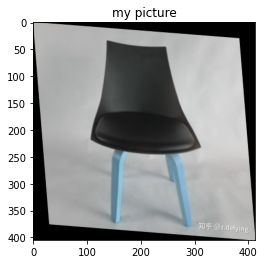

In [58]:
# 显示在 Jupyter 中
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(dst) # https://www.cnblogs.com/denny402/p/5122594.html
plt.title('my picture')
plt.show()

因为平移和缩放的矩阵的比较简单，我们可以直接手动指定。

In [59]:
# 图像平移
# 移位矩阵，水平方向移动100个像素，竖直方向移动200个像素
matShift = np.float32([[1,0,100],[0,1,200]])  # 2行3列
dst = cv2.warpAffine(img, matShift, (width,height))
# 图像缩放
# 缩放矩阵，长宽各缩放一半
matScale = np.float32([[0.5,0,0],[0,0.5,0]])
dst = cv2.warpAffine(img, matScale, (int(width/2),int(height/2)))

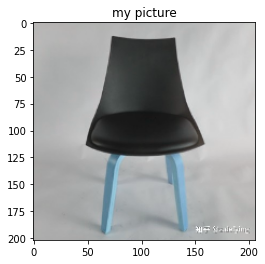

In [60]:
# 显示在 Jupyter 中
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(dst) # https://www.cnblogs.com/denny402/p/5122594.html
plt.title('my picture')
plt.show()

要实现图像旋转，需要通过 cv2.getRotationMatrix2D 来得到二维旋转变换矩阵（2行3列）。

cv2.getRotationMatrix2D 三个参数分别为：1.旋转中心，2.旋转角度，3.缩放比例。角度为正，则图像逆时针旋转，旋转后图像可能会超出边界。

In [61]:
matRotate = cv2.getRotationMatrix2D((width*0.5, height*0.5), 45, 1.0)
dst = cv2.warpAffine(img, matRotate, (width,height))

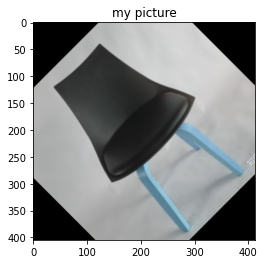

In [62]:
# 显示在 Jupyter 中
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(dst) # https://www.cnblogs.com/denny402/p/5122594.html
plt.title('my picture')
plt.show()

#### 另外一种解释和实现

图像的仿射变换涉及到图像的形状位置角度的变化，是深度学习预处理中常到的功能，在此简单回顾一下。仿射变换具体到图像中的应用，主要是对图像的缩放，旋转，剪切，翻转和平移的组合。在OpenCV中，仿射变换的矩阵是一个2×3的矩阵，其中左边的2×2子矩阵是线性变换矩阵，右边的2×1的两项是平移项：

![H0ISZe](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/H0ISZe.jpg)

对于图像上的任一位置(x,y)，仿射变换执行的是如下的操作：

![cFzAez](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/cFzAez.jpg)

需要注意的是，对于图像而言，宽度方向是x，高度方向是y，坐标的顺序和图像像素对应下标一致。所以原点的位置不是左下角而是右上角，y的方向也不是向上，而是向下。在OpenCV中实现仿射变换是通过仿射变换矩阵和cv2.warpAffine()这个函数，还是通过代码来理解一下，例子中图片的分辨率为600×400：

```python
import cv2
import numpy as np

# 读取一张斯里兰卡拍摄的大象照片
img = cv2.imread('lanka_safari.jpg')

# 沿着横纵轴放大1.6倍，然后平移(-150,-240)，最后沿原图大小截取，等效于裁剪并放大
M_crop_elephant = np.array([
    [1.6, 0, -150],
    [0, 1.6, -240]
], dtype=np.float32)

img_elephant = cv2.warpAffine(img, M_crop_elephant, (400, 600))
cv2.imwrite('lanka_elephant.jpg', img_elephant)

# x轴的剪切变换，角度15°
theta = 15 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)

img_sheared = cv2.warpAffine(img, M_shear, (400, 600))
cv2.imwrite('lanka_safari_sheared.jpg', img_sheared)

# 顺时针旋转，角度15°
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

img_rotated = cv2.warpAffine(img, M_rotate, (400, 600))
cv2.imwrite('lanka_safari_rotated.jpg', img_rotated)

# 某种变换，具体旋转+缩放+旋转组合可以通过SVD分解理解
M = np.array([
    [1, 1.5, -400],
    [0.5, 2, -100]
], dtype=np.float32)

img_transformed = cv2.warpAffine(img, M, (400, 600))
cv2.imwrite('lanka_safari_transformed.jpg', img_transformed)
```

代码实现的操作示意在下图中：

![r68Pup](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/r68Pup.jpg)

### 基本绘图

OpenCV提供了各种绘图的函数，可以在画面上绘制线段，圆，矩形和多边形等，还可以在图像上指定位置打印文字，比如下面例子：

```python
import numpy as np
import cv2

# 定义一块宽600，高400的画布，初始化为白色
canvas = np.zeros((400, 600, 3), dtype=np.uint8) + 255

# 画一条纵向的正中央的黑色分界线
cv2.line(canvas, (300, 0), (300, 399), (0, 0, 0), 2)

# 画一条右半部份画面以150为界的横向分界线
cv2.line(canvas, (300, 149), (599, 149), (0, 0, 0), 2)

# 左半部分的右下角画个红色的圆
cv2.circle(canvas, (200, 300), 75, (0, 0, 255), 5)

# 左半部分的左下角画个蓝色的矩形
cv2.rectangle(canvas, (20, 240), (100, 360), (255, 0, 0), thickness=3)

# 定义两个三角形，并执行内部绿色填充
triangles = np.array([
    [(200, 240), (145, 333), (255, 333)],
    [(60, 180), (20, 237), (100, 237)]])
cv2.fillPoly(canvas, triangles, (0, 255, 0))

# 画一个黄色五角星
# 第一步通过旋转角度的办法求出五个顶点
phi = 4 * np.pi / 5
rotations = [[[np.cos(i * phi), -np.sin(i * phi)], [i * np.sin(phi), np.cos(i * phi)]] for i in range(1, 5)]
pentagram = np.array([[[[0, -1]] + [np.dot(m, (0, -1)) for m in rotations]]], dtype=np.float)

# 定义缩放倍数和平移向量把五角星画在左半部分画面的上方
pentagram = np.round(pentagram * 80 + np.array([160, 120])).astype(np.int)

# 将5个顶点作为多边形顶点连线，得到五角星
cv2.polylines(canvas, pentagram, True, (0, 255, 255), 9)

# 按像素为间隔从左至右在画面右半部份的上方画出HSV空间的色调连续变化
for x in range(302, 600):
    color_pixel = np.array([[[round(180*float(x-302)/298), 255, 255]]], dtype=np.uint8)
    line_color = [int(c) for c in cv2.cvtColor(color_pixel, cv2.COLOR_HSV2BGR)[0][0]]
    cv2.line(canvas, (x, 0), (x, 147), line_color)

# 如果定义圆的线宽大于半斤，则等效于画圆点，随机在画面右下角的框内生成坐标
np.random.seed(42)
n_pts = 30
pts_x = np.random.randint(310, 590, n_pts)
pts_y = np.random.randint(160, 390, n_pts)
pts = zip(pts_x, pts_y)

# 画出每个点，颜色随机
for pt in pts:
    pt_color = [int(c) for c in np.random.randint(0, 255, 3)]
    cv2.circle(canvas, pt, 3, pt_color, 5)

# 在左半部分最上方打印文字
cv2.putText(canvas,
            'Python-OpenCV Drawing Example',
            (5, 15),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 0, 0),
            1)

cv2.imshow('Example of basic drawing functions', canvas)
cv2.waitKey()
```

执行这段代码得到如下的图像：

![gJTWX3](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/gJTWX3.jpg)

### 视频功能

视频中最常用的就是从视频设备采集图片或者视频，或者读取视频文件并从中采样。所以比较重要的也是两个模块，一个是VideoCapture，用于获取相机设备并捕获图像和视频，或是从文件中捕获。还有一个VideoWriter，用于生成视频。还是来看例子理解这两个功能的用法，首先是一个制作延时摄影视频的小例子：

In [63]:
import cv2
import time

interval = 60           # 捕获图像的间隔，单位：秒
num_frames = 500        # 捕获图像的总帧数
out_fps = 24            # 输出文件的帧率

# VideoCapture(0)表示打开默认的相机
cap = cv2.VideoCapture(0)

# 获取捕获的分辨率
size =(int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
       int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
       
# 设置要保存视频的编码，分辨率和帧率
video = cv2.VideoWriter(
    "time_lapse.avi", 
    cv2.VideoWriter_fourcc('M','P','4','2'), 
    out_fps, 
    size
)

# 对于一些低画质的摄像头，前面的帧可能不稳定，略过
for i in range(42):
    cap.read()

# 开始捕获，通过read()函数获取捕获的帧
try:
    for i in range(num_frames):
        _, frame = cap.read()
        video.write(frame)

        # 如果希望把每一帧也存成文件，比如制作GIF，则取消下面的注释
        # filename = '{:0>6d}.png'.format(i)
        # cv2.imwrite(filename, frame)

        print('Frame {} is captured.'.format(i))
        time.sleep(interval)
except KeyboardInterrupt:
    # 提前停止捕获
    print('Stopped! {}/{} frames captured!'.format(i, num_frames))

# 释放资源并写入视频文件
video.release()
cap.release()


Frame 0 is captured.
Stopped! 0/500 frames captured!


这个例子实现了延时摄影的功能，把程序打开并将摄像头对准一些缓慢变化的画面，比如桌上缓慢蒸发的水，或者正在生长的小草，就能制作出有趣的延时摄影作品。比如下面这个链接中的图片就是用这段程序生成的：

[http://images.cnitblog.com/blog2015/609274/201503/251904209276278.gif](https://link.zhihu.com/?target=http%3A//images.cnitblog.com/blog2015/609274/201503/251904209276278.gif)

程序的结构非常清晰简单，注释里也写清楚了每一步，所以流程就不解释了。需要提一下的有两点：一个是VideoWriter中的一个函数cv2.VideoWriter_fourcc()。这个函数指定了视频编码的格式，比如例子中用的是MP42，也就是MPEG-4，更多编码方式可以在下面的地址查询：

[Video Codecs by FOURCC](https://link.zhihu.com/?target=http%3A//www.fourcc.org/codecs.php)

还有一个是KeyboardInterrupt，这是一个常用的异常，用来获取用户Ctrl+C的中止，捕获这个异常后直接结束循环并释放VideoCapture和VideoWriter的资源，使已经捕获好的部分视频可以顺利生成。

从视频中截取帧也是处理视频时常见的任务，下面代码实现的是遍历一个指定文件夹下的所有视频并按照指定的间隔进行截屏并保存：

```python
import cv2
import os
import sys

# 第一个输入参数是包含视频片段的路径
input_path = sys.argv[1]

# 第二个输入参数是设定每隔多少帧截取一帧
frame_interval = int(sys.argv[2])

# 列出文件夹下所有的视频文件
filenames = os.listdir(input_path)

# 获取文件夹名称
video_prefix = input_path.split(os.sep)[-1]

# 建立一个新的文件夹，名称为原文件夹名称后加上_frames
frame_path = '{}_frames'.format(input_path)
if not os.path.exists(frame_path):
    os.mkdir(frame_path)

# 初始化一个VideoCapture对象
cap = cv2.VideoCapture()

# 遍历所有文件
for filename in filenames:
    filepath = os.sep.join([input_path, filename])
    
    # VideoCapture::open函数可以从文件获取视频
    cap.open(filepath)
    
    # 获取视频帧数
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # 同样为了避免视频头几帧质量低下，黑屏或者无关等
    for i in range(42):
        cap.read()
    
    for i in range(n_frames):
        ret, frame = cap.read()
        
        # 每隔frame_interval帧进行一次截屏操作
        if i % frame_interval == 0:
            imagename = '{}_{}_{:0>6d}.jpg'.format(video_prefix, filename.split('.')[0], i)
            imagepath = os.sep.join([frame_path, imagename])
            print('exported {}!'.format(imagepath))
            cv2.imwrite(imagepath, frame)

# 执行结束释放资源
cap.release()
```

### 用OpenCV实现数据增加小工具

到目前我们已经熟悉了 numpy 中的随机模块，多进程调用和 OpenCV 的基本操作，基于这些基础，本节将从思路到代码一步步实现一个最基本的数据增加小工具。

前面提到过数据增加（data augmentation），作为一种深度学习中的常用手段，数据增加对模型的泛化性和准确性都有帮助。

数据增加的具体使用方式一般有两种，一种是实时增加，比如在Caffe中加入数据扰动层，每次图像都先经过扰动操作，再去训练，这样训练经过几代（epoch）之后，就等效于数据增加。还有一种是更加直接简单一些的，就是在训练之前就通过图像处理手段对数据样本进行扰动和增加，也就是本节要实现的。

这个例子中将包含三种基本类型的扰动：

* 随机裁剪，
* 随机旋转，
* 随机颜色/明暗。

#### 随机裁剪

AlexNet 中已经讲过了随机裁剪的基本思路，我们的小例子中打算更进一步：在裁剪的时候考虑图像宽高比的扰动。在绝大多数用于分类的图片中，样本进入网络前都是要变为统一大小，所以宽高比扰动相当于对物体的横向和纵向进行了缩放，这样除了物体的位置扰动，又多出了一项扰动。只要变化范围控制合适，目标物体始终在画面内，这种扰动是有助于提升泛化性能的。实现这种裁剪的思路如下图所示：

![GzYLpY](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/GzYLpY.jpg)

图中最左边是一幅需要剪裁的画面，首先根据这幅画面我们可以算出一个宽高比w/h。然后设定一个小的扰动范围δ和要裁剪的画面占原画面的比例β，从 -$\delta$ 到 $\delta$ 之间按均匀采样，获取一个随机数 $\hat \delta$ 作为裁剪后画面的宽高比扰动的比例，则裁剪后画面的宽和高分别为：

$$
h^{\prime}=h \sqrt{\frac{\beta}{1+\hat{\delta}}}
$$

想象一下先把这个宽为 $w^{\prime}$，高为 $h^{\prime}$ 的区域置于原画面的右下角，则这个区域的左上角和原画面的左上角框出的小区域，如图中的虚线框所示，就是裁剪后区域左上角可以取值的范围。所以在这个区域内随机采一点作为裁剪区域的左上角，就实现了如图中位置随机，且宽高比也随机的裁剪。


#### 随机旋转

前面讲到过的旋转比起来，做数据增加时，一般希望旋转是沿着画面的中心。这样除了要知道旋转角度，还得计算平移的量才能让仿射变换的效果等效于旋转轴在画面中心，好在 OpenCV 中有现成的函数cv2.getRotationMatrix2D() 可以使用。这个函数的第一个参数是旋转中心，第二个参数是逆时针旋转角度，第三个参数是缩放倍数，对于只是旋转的情况下这个值是1，返回值就是做仿射变换的矩阵。

直接用这个函数并接着使用 cv2.warpAffine() 会有一个潜在的问题，就是旋转之后会出现黑边。如果要旋转后的画面不包含黑边，就得沿着原来画面的轮廓做个内接矩形，该矩形的宽高比和原画面相同，如下图所示：

![zPxRq2](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/zPxRq2.jpg)

在图中，可以看到，限制内接矩形大小的主要是原画面更靠近中心的那条边，也就是图中比较长的一条边 AB。因此我们只要沿着中心 O 和内接矩形的顶点方向的直线，求出和 AB 的交点 P，就得到了内接矩形的大小。先来看长边的方程，考虑之前画面和横轴相交的点，经过角度 -θ 旋转后，到了图中的 Q 点所在：

$$
\left[\begin{array}{l}
x_{Q} \\
y_{Q}
\end{array}\right]=\left[\begin{array}{cc}
\cos (-\theta) & -\cos (-\theta) \\
\sin (-\theta) & \cos (-\theta)
\end{array}\right]\left[\begin{array}{c}
-\frac{w}{2} \\
0
\end{array}\right]=\left[\begin{array}{c}
-\frac{w}{2} \cos (\theta) \\
\frac{w}{2} \sin (\theta)
\end{array}\right]
$$

因为长边所在直线过 $Q$ 点, 且斜率为 $1 / \tan (\theta)$, 所以有:

$$
\frac{y-\frac{w}{2} \sin (\theta)}{x+\frac{w}{2} \cos (\theta)}=\frac{1}{\tan (\theta)}
$$

这时候考虑OP这条直线:

$$
y=-\frac{h}{w} x
$$

把这个公式带入再前边一个公式, 求解可以得到:

$$
x=-\frac{w}{2} \cdot \frac{\cos (\theta)+\sin (\theta) \tan (\theta)}{\frac{h}{w} \tan (\theta)+1}
$$

注意到在这个问题中, 每个象限和相邻象限都是轴对称的, 而且旋转角度对剪裁宽度和长度的影响是周期 ( $\mathrm{T}=\pi)$ 变化, 再加上我们关心的其实并不是四个点的位置, 而是旋转后要截取的矩形的宽w'和高 $\mathrm{h}$ ', 所以复杂的分区间情况也简化了, 首先对于旋转角度, 因为周期为 $\pi$, 所以都可以化到0到π之间, 然后因为对称性, 进一步有: 于是对于 0 到π/2之间的 $\theta$, 有:

$$
\theta= \begin{cases}\theta, & \text { if } \theta \leq \frac{\pi}{2} \\ \pi-\theta, & \text { else }\end{cases}
$$

于是对于 0 到 $\frac{\pi}{2}$ 之间的 $\theta$,有：

$$
r= \begin{cases}h / w, & \text { if } \mathrm{h}>\mathrm{w} \\ w / h, & \text { else }\end{cases}
$$

$$
\beta=\frac{\cos (\theta)+\sin (\theta) \tan (\theta)}{r \tan (\theta)+1}
$$


$$
\begin{aligned}
&w^{\prime}=\beta w \\
&h^{\prime}=\beta h
\end{aligned}
$$
当然需要注意的是, 对于宽高比非常大或者非常小的图片, 旋转后如果裁剪往往得到的画面是非常小的一部分, 甚至不包含目标物体。所以是否需要旋转, 以及是否需要裁剪, 如果裁剪角度多少合适, 都要视情况而定。


#### 随机颜色和明暗

比起AlexNet论文里在PCA之后的主成分上做扰动的方法，本书用来实现随机的颜色以及明暗的方法相对简单很多，就是给HSV空间的每个通道，分别加上一个微小的扰动。其中对于色调，从 -$\delta$  到 $\delta$ 之间按均匀采样，获取一个随机数$ \hat \delta$ 作为要扰动的值，然后新的像素值x’为原始像素值x +$\hat \delta$ ；对于其他两个空间则是新像素值x’为原始像素值x的(1+$\hat \delta$)倍，从而实现色调，饱和度和明暗度的扰动。

因为明暗度并不会对图像的直方图相对分布产生大的影响，所以在  HSV 扰动基础上，考虑再加入一个Gamma扰动，方法是设定一个大于 1 的 Gamma 值的上限 γ，因为这个值通常会和 1 是一个量级，再用均匀采样的近似未必合适，所以从 -logγ 到 logγ 之间均匀采样一个值 α，然后用 $e^{\alpha}$ 作为Gamma值进行变换。



#### 多进程调用加速处理

做数据增加时如果样本量本身就不小，则处理起来可能会很耗费时间，所以可以考虑利用多进程并行处理。比如我们的例子中，设定使用场景是输入一个文件夹路径，该文件夹下包含了所有原始的数据样本。用户指定输出的文件夹和打算增加图片的总量。执行程序的时候，通过os.listdir()获取所有文件的路径，然后按照上一章讲过的多进程平均划分样本的办法，把文件尽可能均匀地分给不同进程，进行处理。


#### 代码：图片数据增加小工具


按照前面4个部分的思路和方法，这节来实现这么一个图片数据增加小工具，首先对于一些基础的操作，我们定义在一个叫做image_augmentation.py的文件里：

In [ ]:
import numpy as np
import cv2

'''
定义裁剪函数，四个参数分别是：
左上角横坐标x0
左上角纵坐标y0
裁剪宽度w
裁剪高度h
'''
crop_image = lambda img, x0, y0, w, h: img[y0:y0+h, x0:x0+w]

'''
随机裁剪
area_ratio为裁剪画面占原画面的比例
hw_vari是扰动占原高宽比的比例范围
'''
def random_crop(img, area_ratio, hw_vari):
    h, w = img.shape[:2]
    hw_delta = np.random.uniform(-hw_vari, hw_vari)
    hw_mult = 1 + hw_delta
    
    # 下标进行裁剪，宽高必须是正整数
    w_crop = int(round(w*np.sqrt(area_ratio*hw_mult)))
    
    # 裁剪宽度不可超过原图可裁剪宽度
    if w_crop > w:
        w_crop = w
        
    h_crop = int(round(h*np.sqrt(area_ratio/hw_mult)))
    if h_crop > h:
        h_crop = h
    
    # 随机生成左上角的位置
    x0 = np.random.randint(0, w-w_crop+1)
    y0 = np.random.randint(0, h-h_crop+1)
    
    return crop_image(img, x0, y0, w_crop, h_crop)

'''
定义旋转函数：
angle是逆时针旋转的角度
crop是个布尔值，表明是否要裁剪去除黑边
'''
def rotate_image(img, angle, crop):
    h, w = img.shape[:2]
    
    # 旋转角度的周期是360°
    angle %= 360
    
    # 用OpenCV内置函数计算仿射矩阵
    M_rotate = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    
    # 得到旋转后的图像
    img_rotated = cv2.warpAffine(img, M_rotate, (w, h))

    # 如果需要裁剪去除黑边
    if crop:
        # 对于裁剪角度的等效周期是180°
        angle_crop = angle % 180
        
        # 并且关于90°对称
        if angle_crop > 90:
            angle_crop = 180 - angle_crop
            
        # 转化角度为弧度
        theta = angle_crop * np.pi / 180.0
        
        # 计算高宽比
        hw_ratio = float(h) / float(w)
        
        # 计算裁剪边长系数的分子项
        tan_theta = np.tan(theta)
        numerator = np.cos(theta) + np.sin(theta) * tan_theta
        
        # 计算分母项中和宽高比相关的项
        r = hw_ratio if h > w else 1 / hw_ratio
        
        # 计算分母项
        denominator = r * tan_theta + 1
        
        # 计算最终的边长系数
        crop_mult = numerator / denominator
        
        # 得到裁剪区域
        w_crop = int(round(crop_mult*w))
        h_crop = int(round(crop_mult*h))
        x0 = int((w-w_crop)/2)
        y0 = int((h-h_crop)/2)

        img_rotated = crop_image(img_rotated, x0, y0, w_crop, h_crop)

    return img_rotated

'''
随机旋转
angle_vari是旋转角度的范围[-angle_vari, angle_vari)
p_crop是要进行去黑边裁剪的比例
'''
def random_rotate(img, angle_vari, p_crop):
    angle = np.random.uniform(-angle_vari, angle_vari)
    crop = False if np.random.random() > p_crop else True
    return rotate_image(img, angle, crop)

'''
定义hsv变换函数：
hue_delta是色调变化比例
sat_delta是饱和度变化比例
val_delta是明度变化比例
'''
def hsv_transform(img, hue_delta, sat_mult, val_mult):
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float)
    img_hsv[:, :, 0] = (img_hsv[:, :, 0] + hue_delta) % 180
    img_hsv[:, :, 1] *= sat_mult
    img_hsv[:, :, 2] *= val_mult
    img_hsv[img_hsv > 255] = 255
    return cv2.cvtColor(np.round(img_hsv).astype(np.uint8), cv2.COLOR_HSV2BGR)

'''
随机hsv变换
hue_vari是色调变化比例的范围
sat_vari是饱和度变化比例的范围
val_vari是明度变化比例的范围
'''
def random_hsv_transform(img, hue_vari, sat_vari, val_vari):
    hue_delta = np.random.randint(-hue_vari, hue_vari)
    sat_mult = 1 + np.random.uniform(-sat_vari, sat_vari)
    val_mult = 1 + np.random.uniform(-val_vari, val_vari)
    return hsv_transform(img, hue_delta, sat_mult, val_mult)

'''
定义gamma变换函数：
gamma就是Gamma
'''
def gamma_transform(img, gamma):
    gamma_table = [np.power(x / 255.0, gamma) * 255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    return cv2.LUT(img, gamma_table)

'''
随机gamma变换
gamma_vari是Gamma变化的范围[1/gamma_vari, gamma_vari)
'''
def random_gamma_transform(img, gamma_vari):
    log_gamma_vari = np.log(gamma_vari)
    alpha = np.random.uniform(-log_gamma_vari, log_gamma_vari)
    gamma = np.exp(alpha)
    return gamma_transform(img, gamma)

调用这些函数需要通过一个主程序。

这个主程序里首先定义三个子模块，定义一个函数parse_arg()通过Python的argparse模块定义了各种输入参数和默认值。

需要注意的是这里用argparse来输入所有参数是因为参数总量并不是特别多，如果增加了更多的扰动方法，更合适的参数输入方式可能是通过一个配置文件。

然后定义一个生成待处理图像列表的函数generate_image_list()，根据输入中要增加图片的数量和并行进程的数目尽可能均匀地为每个进程生成了需要处理的任务列表。执行随机扰动的代码定义在augment_images()中，这个函数是每个进程内进行实际处理的函数，执行顺序是镜像\rightarrow 裁剪\rightarrow 旋转\rightarrow HSV\rightarrow Gamma。

需要注意的是镜像\rightarrow 裁剪，因为只是个演示例子，这未必是一个合适的顺序。最后定义一个main函数进行调用，代码如下：

In [ ]:
import os
import argparse
import random
import math
from multiprocessing import Process
from multiprocessing import cpu_count

import cv2

# 导入image_augmentation.py为一个可调用模块
import image_augmentation as ia

# 利用Python的argparse模块读取输入输出和各种扰动参数
def parse_args():
    parser = argparse.ArgumentParser(
        description='A Simple Image Data Augmentation Tool',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)

    parser.add_argument('input_dir',
                        help='Directory containing images')
    parser.add_argument('output_dir',
                        help='Directory for augmented images')
    parser.add_argument('num',
                        help='Number of images to be augmented',
                        type=int)

    parser.add_argument('--num_procs',
                        help='Number of processes for paralleled augmentation',
                        type=int, default=cpu_count())

    parser.add_argument('--p_mirror',
                        help='Ratio to mirror an image',
                        type=float, default=0.5)

    parser.add_argument('--p_crop',
                        help='Ratio to randomly crop an image',
                        type=float, default=1.0)
    parser.add_argument('--crop_size',
                        help='The ratio of cropped image size to original image size, in area',
                        type=float, default=0.8)
    parser.add_argument('--crop_hw_vari',
                        help='Variation of h/w ratio',
                        type=float, default=0.1)

    parser.add_argument('--p_rotate',
                        help='Ratio to randomly rotate an image',
                        type=float, default=1.0)
    parser.add_argument('--p_rotate_crop',
                        help='Ratio to crop out the empty part in a rotated image',
                        type=float, default=1.0)
    parser.add_argument('--rotate_angle_vari',
                        help='Variation range of rotate angle',
                        type=float, default=10.0)

    parser.add_argument('--p_hsv',
                        help='Ratio to randomly change gamma of an image',
                        type=float, default=1.0)
    parser.add_argument('--hue_vari',
                        help='Variation of hue',
                        type=int, default=10)
    parser.add_argument('--sat_vari',
                        help='Variation of saturation',
                        type=float, default=0.1)
    parser.add_argument('--val_vari',
                        help='Variation of value',
                        type=float, default=0.1)

    parser.add_argument('--p_gamma',
                        help='Ratio to randomly change gamma of an image',
                        type=float, default=1.0)
    parser.add_argument('--gamma_vari',
                        help='Variation of gamma',
                        type=float, default=2.0)

    args = parser.parse_args()
    args.input_dir = args.input_dir.rstrip('/')
    args.output_dir = args.output_dir.rstrip('/')

    return args

'''
根据进程数和要增加的目标图片数，
生成每个进程要处理的文件列表和每个文件要增加的数目
'''
def generate_image_list(args):
    # 获取所有文件名和文件总数
    filenames = os.listdir(args.input_dir)
    num_imgs = len(filenames)

    # 计算平均处理的数目并向下取整
    num_ave_aug = int(math.floor(args.num/num_imgs))
    
    # 剩下的部分不足平均分配到每一个文件，所以做成一个随机幸运列表
    # 对于幸运的文件就多增加一个，凑够指定的数目
    rem = args.num - num_ave_aug*num_imgs
    lucky_seq = [True]*rem + [False]*(num_imgs-rem)
    random.shuffle(lucky_seq)

    # 根据平均分配和幸运表策略，
    # 生成每个文件的全路径和对应要增加的数目并放到一个list里
    img_list = [
        (os.sep.join([args.input_dir, filename]), num_ave_aug+1 if lucky else num_ave_aug)
        for filename, lucky in zip(filenames, lucky_seq)
    ]
    
    # 文件可能大小不一，处理时间也不一样，
    # 所以随机打乱，尽可能保证处理时间均匀
    random.shuffle(img_list)

    # 生成每个进程的文件列表，
    # 尽可能均匀地划分每个进程要处理的数目
    length = float(num_imgs) / float(args.num_procs)
    indices = [int(round(i * length)) for i in range(args.num_procs + 1)]
    return [img_list[indices[i]:indices[i + 1]] for i in range(args.num_procs)]

# 每个进程内调用图像处理函数进行扰动的函数
def augment_images(filelist, args):
    # 遍历所有列表内的文件
    for filepath, n in filelist:
        img = cv2.imread(filepath)
        filename = filepath.split(os.sep)[-1]
        dot_pos = filename.rfind('.')
        
        # 获取文件名和后缀名
        imgname = filename[:dot_pos]
        ext = filename[dot_pos:]

        print('Augmenting {} ...'.format(filename))
        for i in range(n):
            img_varied = img.copy()
            
            # 扰动后文件名的前缀
            varied_imgname = '{}_{:0>3d}_'.format(imgname, i)
            
            # 按照比例随机对图像进行镜像
            if random.random() < args.p_mirror:
                # 利用numpy.fliplr(img_varied)也能实现
                img_varied = cv2.flip(img_varied, 1)
                varied_imgname += 'm'
            
            # 按照比例随机对图像进行裁剪
            if random.random() < args.p_crop:
                img_varied = ia.random_crop(
                    img_varied,
                    args.crop_size,
                    args.crop_hw_vari)
                varied_imgname += 'c'
            
            # 按照比例随机对图像进行旋转
            if random.random() < args.p_rotate:
                img_varied = ia.random_rotate(
                    img_varied,
                    args.rotate_angle_vari,
                    args.p_rotate_crop)
                varied_imgname += 'r'
            
            # 按照比例随机对图像进行HSV扰动
            if random.random() < args.p_hsv:
                img_varied = ia.random_hsv_transform(
                    img_varied,
                    args.hue_vari,
                    args.sat_vari,
                    args.val_vari)
                varied_imgname += 'h'
            
            # 按照比例随机对图像进行Gamma扰动
            if random.random() < args.p_gamma:
                img_varied = ia.random_gamma_transform(
                    img_varied,
                    args.gamma_vari)
                varied_imgname += 'g'
            
            # 生成扰动后的文件名并保存在指定的路径
            output_filepath = os.sep.join([
                args.output_dir,
                '{}{}'.format(varied_imgname, ext)])
            cv2.imwrite(output_filepath, img_varied)

# 主函数
def main():
    # 获取输入输出和变换选项
    args = parse_args()
    params_str = str(args)[10:-1]

    # 如果输出文件夹不存在，则建立文件夹
    if not os.path.exists(args.output_dir):
        os.mkdir(args.output_dir)

    print('Starting image data augmentation for {}\n'
          'with\n{}\n'.format(args.input_dir, params_str))

    # 生成每个进程要处理的列表
    sublists = generate_image_list(args)
    
    # 创建进程
    processes = [Process(target=augment_images, args=(x, args, )) for x in sublists]

    # 并行多进程处理
    for p in processes:
        p.start()

    for p in processes:
        p.join()

    print('\nDone!')

if __name__ == '__main__':
    main()


为了排版方便，并没有很遵守Python的规范（PEP8）。注意到除了前面提的三种类型的变化，还增加了镜像变化，这主要是因为这种变换太简单了，顺手就写上了。还有默认进程数用的是cpu_count()函数，这个获取的是cpu的核数。把这段代码保存为run_augmentation.py，然后在命令行输入：

>> python run_augmentation.py -h

 

或者

>> python run_augmentation.py --help

 

就能看到脚本的使用方法，每个参数的含义，还有默认值。接下里来执行一个图片增加任务：

>> python run_augmentation.py imagenet_samples more_samples 1000 --rotate_angle_vari 180 --p_rotate_crop 0.5

其中imagenet_samples为一些从imagenet图片url中随机下载的一些图片，--rotate_angle_vari设为180方便测试全方向的旋转，--p_rotate_crop设置为0.5，让旋转裁剪对一半图片生效。扰动增加后的1000张图片在more_samples文件夹下，得到的部分结果如下：

![HFc1g6](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/HFc1g6.jpg)

### 用OpenCV实现数据标注小工具

除了对图像的处理，OpenCV的图形用户界面（Graphical User Interface, GUI）和绘图等相关功能也是很有用的功能，无论是可视化，图像调试还是我们这节要实现的标注任务，都可以有所帮助。这节先介绍OpenCV窗口的最基本使用和交互，然后基于这些基础和之前的知识实现一个用于物体检测任务标注的小工具。

#### OpenCV窗口循环

OpenCV显示一幅图片的函数是cv2.imshow()，第一个参数是显示图片的窗口名称，第二个参数是图片的array。不过如果直接执行这个函数的话，什么都不会发生，因为这个函数得配合cv2.waitKey()一起使用。cv2.waitKey()指定当前的窗口显示要持续的毫秒数，比如cv2.waitKey(1000)就是显示一秒，然后窗口就关闭了。比较特殊的是cv2.waitKey(0)，并不是显示0毫秒的意思，而是一直显示，直到有键盘上的按键被按下，或者鼠标点击了窗口的小叉子才关闭。cv2.waitKey()的默认参数就是0，所以对于图像展示的场景，cv2.waitKey()或者cv2.waitKey(0)是最常用的：

```python
import cv2

img = cv2.imread('Aitutaki.png')
cv2.imshow('Honeymoon Island', img)
cv2.waitKey()
```

执行这段代码得到如下窗口：

![UG4q0V](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/UG4q0V.jpg)



cv2.waitKey()参数不为零的时候则可以和循环结合产生动态画面，比如在6.2.4的延时小例子中，我们把延时摄影保存下来的所有图像放到一个叫做frames的文件夹下。下面代码从frames的文件夹下读取所有图片并以24的帧率在窗口中显示成动画：

```python
import os
from itertools import cycle
import cv2

# 列出frames文件夹下的所有图片
filenames = os.listdir('frames')

# 通过itertools.cycle生成一个无限循环的迭代器，每次迭代都输出下一张图像对象
img_iter = cycle([cv2.imread(os.sep.join(['frames', x])) for x in filenames])

key = 0
while key & 0xFF != 27:
    cv2.imshow('Animation', next(img_iter))
    key = cv2.waitKey(42)

```

在这个例子中我们采用了Python的itertools模块中的cycle函数，这个函数可以把一个可遍历结构编程一个无限循环的迭代器。另外从这个例子中我们还发现，cv2.waitKey()返回的就是键盘上出发的按键。对于字母就是ascii码，特殊按键比如上下左右等，则对应特殊的值，其实这就是键盘事件的最基本用法。

#### 鼠标和键盘事件

因为GUI总是交互的，所以鼠标和键盘事件基本使用必不可少，上节已经提到了cv2.waitKey()就是获取键盘消息的最基本方法。比如下面这段循环代码就能够获取键盘上按下的按键，并在终端输出：

```python
while key != 27:
    cv2.imshow('Honeymoon Island', img)
    key = cv2.waitKey()
    # 如果获取的键值小于256则作为ascii码输出对应字符，否则直接输出值
    msg = '{} is pressed'.format(chr(key) if key < 256 else key)
    print(msg)
```

通过这个程序我们能获取一些常用特殊按键的值，比如在作业用的机器上，四个方向的按键和删除键对应的值如下：

- 上（↑）：65362

- 下（↓）：65364

- 左（←）：65361

- 右（→）：65363

- 删除（Delete）：65535

需要注意的是在不同的操作系统里这些值可能是不一样的。鼠标事件比起键盘事件稍微复杂一点点，需要定义一个回调函数，然后把回调函数和一个指定名称的窗口绑定，这样只要鼠标位于画面区域内的事件就都能捕捉到。把下面这段代码插入到上段代码的while之前，就能获取当前鼠标的位置和动作并输出：

```python

# 定义鼠标事件回调函数
def on_mouse(event, x, y, flags, param):

    # 鼠标左键按下，抬起，双击
    if event == cv2.EVENT_LBUTTONDOWN:
        print('Left button down at ({}, {})'.format(x, y))
    elif event == cv2.EVENT_LBUTTONUP:
        print('Left button up at ({}, {})'.format(x, y))
    elif event == cv2.EVENT_LBUTTONDBLCLK:
        print('Left button double clicked at ({}, {})'.format(x, y))

    # 鼠标右键按下，抬起，双击
    elif event == cv2.EVENT_RBUTTONDOWN:
        print('Right button down at ({}, {})'.format(x, y))
    elif event == cv2.EVENT_RBUTTONUP:
        print('Right button up at ({}, {})'.format(x, y))
    elif event == cv2.EVENT_RBUTTONDBLCLK:
        print('Right button double clicked at ({}, {})'.format(x, y))

    # 鼠标中/滚轮键（如果有的话）按下，抬起，双击
    elif event == cv2.EVENT_MBUTTONDOWN:
        print('Middle button down at ({}, {})'.format(x, y))
    elif event == cv2.EVENT_MBUTTONUP:
        print('Middle button up at ({}, {})'.format(x, y))
    elif event == cv2.EVENT_MBUTTONDBLCLK:
        print('Middle button double clicked at ({}, {})'.format(x, y))

    # 鼠标移动
    elif event == cv2.EVENT_MOUSEMOVE:
        print('Moving at ({}, {})'.format(x, y))

# 为指定的窗口绑定自定义的回调函数
cv2.namedWindow('Honeymoon Island')
cv2.setMouseCallback('Honeymoon Island', on_mouse)
```

#### 代码：物体检测标注的小工具

基于上面两小节的基本使用，就能和OpenCV的基本绘图功能就能实现一个超级简单的物体框标注小工具了。基本思路是对要标注的图像建立一个窗口循环，然后每次循环的时候对图像进行一次拷贝。鼠标在画面上画框的操作，以及已经画好的框的相关信息在全局变量中保存，并且在每个循环中根据这些信息，在拷贝的图像上再画一遍，然后显示这份拷贝的图像。

基于这种实现思路，使用上我们采用一个尽量简化的设计：

- 输入是一个文件夹，下面包含了所有要标注物体框的图片。如果图片中标注了物体，则生成一个相同名称加额外后缀名的文件保存标注信息。

- 标注的方式是按下鼠标左键选择物体框的左上角，松开鼠标左键选择物体框的右下角，鼠标右键删除上一个标注好的物体框。所有待标注物体的类别，和标注框颜色由用户自定义，如果没有定义则默认只标注一种物体，定义该物体名称叫“Object”。

- 方向键的←和→用来遍历图片，↑和↓用来选择当前要标注的物体，Delete键删除一张图片和对应的标注信息。

每张图片的标注信息，以及自定义标注物体和颜色的信息，用一个元组表示，第一个元素是物体名字，第二个元素是代表BGR颜色的tuple或者是代表标注框坐标的元组。对于这种并不复杂复杂的数据结构，我们直接利用Python的repr()函数，把数据结构保存成机器可读的字符串放到文件里，读取的时候用eval()函数就能直接获得数据。这样的方便之处在于不需要单独写个格式解析器。如果需要可以在此基础上再编写一个转换工具就能够转换成常见的Pascal VOC的标注格式或是其他的自定义格式。

在这些思路和设计下，我们定义标注信息文件的格式的例子如下：

```python
('Hill', ((221, 163), (741, 291)))
('Horse', ((465, 430), (613, 570)))
```

元组中第一项是物体名称，第二项是标注框左上角和右下角的坐标。这里之所以不把标注信息的数据直接用pickle保存，是因为数据本身不会很复杂，直接保存还有更好的可读性。自定义标注物体和对应标注框颜色的格式也类似，不过更简单些，因为括号可以不写，具体如下：

```python
'Horse', (255, 255, 0)
'Hill', (0, 255, 255)
'DiaoSi', (0, 0, 255)
```

第一项是物体名称，第二项是物体框的颜色。使用的时候把自己定义好的内容放到一个文本里，然后保存成和待标注文件夹同名，后缀名为labels的文件。比如我们在一个叫samples的文件夹下放上一些草原的照片，然后自定义一个samples.labels的文本文件。把上段代码的内容放进去，就定义了小山头的框为黄色，骏马的框为青色，以及红色的屌丝。基于以上，标注小工具的代码如下：

```python
import os
import cv2

# tkinter是Python内置的简单GUI库，实现一些比如打开文件夹，确认删除等操作十分方便
from tkFileDialog import askdirectory
from tkMessageBox import askyesno

# 定义标注窗口的默认名称
WINDOW_NAME = 'Simple Bounding Box Labeling Tool'

# 定义画面刷新的大概帧率（是否能达到取决于电脑性能）
FPS = 24

# 定义支持的图像格式
SUPPOTED_FORMATS = ['jpg', 'jpeg', 'png']

# 定义默认物体框的名字为Object，颜色蓝色，当没有用户自定义物体时用默认物体
DEFAULT_COLOR = {'Object': (255, 0, 0)}

# 定义灰色，用于信息显示的背景和未定义物体框的显示
COLOR_GRAY = (192, 192, 192)

# 在图像下方多出BAR_HEIGHT这么多像素的区域用于显示文件名和当前标注物体等信息
BAR_HEIGHT = 16

# 上下左右，ESC及删除键对应的cv.waitKey()的返回值
# 注意这个值根据操作系统不同有不同，可以通过6.4.2中的代码获取
KEY_UP = 65362
KEY_DOWN = 65364
KEY_LEFT = 65361
KEY_RIGHT = 65363
KEY_ESC = 27
KEY_DELETE = 65535

# 空键用于默认循环
KEY_EMPTY = 0

get_bbox_name = '{}.bbox'.format

# 定义物体框标注工具类
class SimpleBBoxLabeling:

    def __init__(self, data_dir, fps=FPS, window_name=None):
        self._data_dir = data_dir
        self.fps = fps
        self.window_name = window_name if window_name else WINDOW_NAME

        #pt0是正在画的左上角坐标，pt1是鼠标所在坐标
        self._pt0 = None
        self._pt1 = None

        # 表明当前是否正在画框的状态标记
        self._drawing = False

        # 当前标注物体的名称
        self._cur_label = None

        # 当前图像对应的所有已标注框
        self._bboxes = []

        # 如果有用户自定义的标注信息则读取，否则用默认的物体和颜色
        label_path = '{}.labels'.format(self._data_dir)
        self.label_colors = DEFAULT_COLOR if not os.path.exists(label_path) else self.load_labels(label_path)

        # 获取已经标注的文件列表和还未标注的文件列表
        imagefiles = [x for x in os.listdir(self._data_dir) if x[x.rfind('.') + 1:].lower() in SUPPOTED_FORMATS]
        labeled = [x for x in imagefiles if os.path.exists(get_bbox_name(x))]
        to_be_labeled = [x for x in imagefiles if x not in labeled]

        # 每次打开一个文件夹，都自动从还未标注的第一张开始
        self._filelist = labeled + to_be_labeled
        self._index = len(labeled)
        if self._index > len(self._filelist) - 1:
            self._index = len(self._filelist) - 1

    # 鼠标回调函数
    def _mouse_ops(self, event, x, y, flags, param):

        # 按下左键时，坐标为左上角，同时表明开始画框，改变drawing标记为True
        if event == cv2.EVENT_LBUTTONDOWN:
            self._drawing = True
            self._pt0 = (x, y)

        # 左键抬起，表明当前框画完了，坐标记为右下角，并保存，同时改变drawing标记为False
        elif event == cv2.EVENT_LBUTTONUP:
            self._drawing = False
            self._pt1 = (x, y)
            self._bboxes.append((self._cur_label, (self._pt0, self._pt1)))

        # 实时更新右下角坐标方便画框
        elif event == cv2.EVENT_MOUSEMOVE:
            self._pt1 = (x, y)

        # 鼠标右键删除最近画好的框
        elif event == cv2.EVENT_RBUTTONUP:
            if self._bboxes:
                self._bboxes.pop()

    # 清除所有标注框和当前状态
    def _clean_bbox(self):
        self._pt0 = None
        self._pt1 = None
        self._drawing = False
        self._bboxes = []

    # 画标注框和当前信息的函数
    def _draw_bbox(self, img):

        # 在图像下方多出BAR_HEIGHT这么多像素的区域用于显示文件名和当前标注物体等信息
        h, w = img.shape[:2]
        canvas = cv2.copyMakeBorder(img, 0, BAR_HEIGHT, 0, 0, cv2.BORDER_CONSTANT, value=COLOR_GRAY)

        # 正在标注的物体信息，如果鼠标左键已经按下，则显示两个点坐标，否则显示当前待标注物体的名称
        label_msg = '{}: {}, {}'.format(self._cur_label, self._pt0, self._pt1) \
            if self._drawing \
            else 'Current label: {}'.format(self._cur_label)

        # 显示当前文件名，文件个数信息
        msg = '{}/{}: {} | {}'.format(self._index + 1, len(self._filelist), self._filelist[self._index], label_msg)
        cv2.putText(canvas, msg, (1, h+12),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 0, 0), 1)

        # 画出已经标好的框和对应名字
        for label, (bpt0, bpt1) in self._bboxes:
            label_color = self.label_colors[label] if label in self.label_colors else COLOR_GRAY
            cv2.rectangle(canvas, bpt0, bpt1, label_color, thickness=2)
            cv2.putText(canvas, label, (bpt0[0]+3, bpt0[1]+15),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, label_color, 2)

        # 画正在标注的框和对应名字
        if self._drawing:
            label_color = self.label_colors[self._cur_label] if self._cur_label in self.label_colors else COLOR_GRAY
            if self._pt1[0] >= self._pt0[0] and self._pt1[1] >= self._pt0[1]:
                cv2.rectangle(canvas, self._pt0, self._pt1, label_color, thickness=2)
            cv2.putText(canvas, self._cur_label, (self._pt0[0] + 3, self._pt0[1] + 15),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.5, label_color, 2)
        return canvas

    # 利用repr()导出标注框数据到文件
    @staticmethod
    def export_bbox(filepath, bboxes):
        if bboxes:
            with open(filepath, 'w') as f:
                for bbox in bboxes:
                    line = repr(bbox) + '\n'
                    f.write(line)
        elif os.path.exists(filepath):
            os.remove(filepath)

    # 利用eval()读取标注框字符串到数据
    @staticmethod
    def load_bbox(filepath):
        bboxes = []
        with open(filepath, 'r') as f:
            line = f.readline().rstrip()
            while line:
                bboxes.append(eval(line))
                line = f.readline().rstrip()
        return bboxes

    # 利用eval()读取物体及对应颜色信息到数据
    @staticmethod
    def load_labels(filepath):
        label_colors = {}
        with open(filepath, 'r') as f:
            line = f.readline().rstrip()
            while line:
                label, color = eval(line)
                label_colors[label] = color
                line = f.readline().rstrip()
        return label_colors

    # 读取图像文件和对应标注框信息（如果有的话）
    @staticmethod
    def load_sample(filepath):
        img = cv2.imread(filepath)
        bbox_filepath = get_bbox_name(filepath)
        bboxes = []
        if os.path.exists(bbox_filepath):
            bboxes = SimpleBBoxLabeling.load_bbox(bbox_filepath)
        return img, bboxes

    # 导出当前标注框信息并清空
    def _export_n_clean_bbox(self):
        bbox_filepath = os.sep.join([self._data_dir, get_bbox_name(self._filelist[self._index])])
        self.export_bbox(bbox_filepath, self._bboxes)
        self._clean_bbox()

    # 删除当前样本和对应的标注框信息
    def _delete_current_sample(self):
        filename = self._filelist[self._index]
        filepath = os.sep.join([self._data_dir, filename])
        if os.path.exists(filepath):
            os.remove(filepath)
        filepath = get_bbox_name(filepath)
        if os.path.exists(filepath):
            os.remove(filepath)
        self._filelist.pop(self._index)
        print('{} is deleted!'.format(filename))
        
    # 开始OpenCV窗口循环的方法，定义了程序的主逻辑
    def start(self):

        # 之前标注的文件名，用于程序判断是否需要执行一次图像读取
        last_filename = ''
        
        # 标注物体在列表中的下标
        label_index = 0
        
        # 所有标注物体名称的列表
        labels = self.label_colors.keys()

        # 待标注物体的种类数
        n_labels = len(labels)

        # 定义窗口和鼠标回调
        cv2.namedWindow(self.window_name)
        cv2.setMouseCallback(self.window_name, self._mouse_ops)
        key = KEY_EMPTY

        # 定义每次循环的持续时间
        delay = int(1000 / FPS)

        # 只要没有按下Esc键，就持续循环
        while key != KEY_ESC:

            # 上下键用于选择当前标注物体
            if key == KEY_UP:
                if label_index == 0:
                    pass
                else:
                    label_index -= 1

            elif key == KEY_DOWN:
                if label_index == n_labels - 1:
                    pass
                else:
                    label_index += 1

            # 左右键切换当前标注的图片
            elif key == KEY_LEFT:
                # 已经到了第一张图片的话就不需要清空上一张
                if self._index > 0:
                    self._export_n_clean_bbox()

                self._index -= 1
                if self._index < 0:
                    self._index = 0

            elif key == KEY_RIGHT:
                # 已经到了最后一张图片的话就不需要清空上一张
                if self._index < len(self._filelist) - 1:
                    self._export_n_clean_bbox()

                self._index += 1
                if self._index > len(self._filelist) - 1:
                    self._index = len(self._filelist) - 1

            # 删除当前图片和对应标注信息
            elif key == KEY_DELETE:
                if askyesno('Delete Sample', 'Are you sure?'):
                    self._delete_current_sample()
                    key = KEY_EMPTY
                    continue

            # 如果键盘操作执行了换图片，则重新读取，更新图片
            filename = self._filelist[self._index]
            if filename != last_filename:
                filepath = os.sep.join([self._data_dir, filename])
                img, self._bboxes = self.load_sample(filepath)

            # 更新当前标注物体名称
            self._cur_label = labels[label_index]

            # 把标注和相关信息画在图片上并显示指定的时间
            canvas = self._draw_bbox(img)
            cv2.imshow(self.window_name, canvas)
            key = cv2.waitKey(delay)

            # 当前文件名就是下次循环的老文件名
            last_filename = filename

        print('Finished!')

        cv2.destroyAllWindows()
        # 如果退出程序，需要对当前进行保存
        self.export_bbox(os.sep.join([self._data_dir, get_bbox_name(filename)]), self._bboxes)

        print('Labels updated!')

if __name__ == '__main__':
    dir_with_images = askdirectory(title='Where are the images?')
    labeling_task = SimpleBBoxLabeling(dir_with_images)
    labeling_task.start()
```

需要注意的是几个比较通用且独立的方法前加上了一句@staticmethod，表明是个静态方法。执行这个程序，并选择samples文件夹，标注时的画面如下图：

![MM8FNm](https://upiclw.oss-cn-beijing.aliyuncs.com/uPic/MM8FNm.jpg)